### Overview Data 

| **Variable Name**          | **Description**                                                                                     |
|----------------------------|-----------------------------------------------------------------------------------------------------|
| **Country Name**            | Country Name                                                                                        |
| **Country Code**            | Country Code                                                                                        |
| **Year**                    | Year of Data                                                                                        |
| **Pop_Growth**              | Population growth (annual %)                                                                        |
| **Poverty_Ratio**           | Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)                                 |
| **Electricity_Access**      | Access to electricity (% of population)                                                             |
| **Age_Dependency**          | Age dependency ratio (% of working-age population)                                                  |
| **Bank_Capital**            | Bank capital to assets ratio (%)                                                                    |
| **Birth_Rate**              | Birth rate, crude (per 1,000 people)                                                                |
| **Central_gov_debt**        | Central government debt, total (% of GDP)                                                           |
| **Children_Out_School**     | Children out of school (% of primary school age)                                                    |
| **Corruption_Control**      | Control of Corruption: Percentile Rank                                                              |
| **Edu_attainment**          | Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)   |
| **Youth_Employment_Ratio**  | Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)                        |
| **Employers_Percentage**    | Employers, total (% of total employment) (modeled ILO estimate)                                     |
| **Final_Consumption**       | Final consumption expenditure (current US$)                                                         |
| **FDI_Percentage**          | Foreign direct investment, net inflows (% of GDP)                                                   |
| **GDP_PerCapita**           | GDP per capita (current US$)                                                                        |
| **Gini_Index**              | Gini index                                                                                          |
| **Edu_Expenditure**         | Government expenditure on education, total (% of GDP)                                               |
| **HCI**                     | Human capital index (HCI) (scale 0-1)                                                               |
| **Labor_Advanced_Edu**      | Labor force with advanced education (% of total working-age population with advanced education)      |
| **Labor_Total**             | Labor force, total                                                                                  |
| **Life_Expectancy**         | Life expectancy at birth total (years)                                                              |
| **Net_Migration**           | Net migration                                                                                       |


## Import library

In [53]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

## Read dataset

In [54]:
data = pd.read_excel("D:/P_Data_Extract_From_World_Development_Indicators.xlsx") 
data.head(3)

,Country Name,Country Code,Year,Population growth (annual %),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Access to electricity (% of population),Age dependency ratio (% of working-age population),Bank capital to assets ratio (%),"Birth rate, crude (per 1,000 people)","Central government debt, total (% of GDP)",...,Final consumption expenditure (current US$),"Foreign direct investment, net inflows (% of GDP)",GDP per capita (current US$),Gini index,"Government expenditure on education, total (% of GDP)",Human capital index (HCI) (scale 0-1),Labor force with advanced education (% of total working-age population with advanced education),"Labor force, total","Life expectancy at birth, total (years)",Net migration
0,Indonesia,IDN,2000,1.447088,43.8,86.3,55.335852,NaN,21.860,,...,1.125152e+11,-2.757440,770.865352,30.3,NaN,,87.261,100650982,66.433,-42697
1,Indonesia,IDN,2001,1.410099,40.3,86.3,54.702120,NaN,21.548,,...,1.123758e+11,-1.855686,739.003947,31.2,2.46003,,79.744,101677754,66.758,-64261
2,Indonesia,IDN,2002,1.373519,23.5,87.6,54.144727,NaN,21.174,,...,1.465101e+11,0.074152,888.901390,30.2,2.64569,,86.065,101821401,67.134,-83985


change of variable name 

In [55]:
# Define the mapping from long descriptions to variable names
column_mapping = {
    "Country Name": "Country_Name",
    "Country Code": "Country_Code",
    "Year": "Year",
    "Population growth (annual %)": "Pop_Growth",
    "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)": "Poverty_Ratio",
    "Access to electricity (% of population)": "Electricity_Access",
    "Age dependency ratio (% of working-age population)": "Age_Dependency",
    "Bank capital to assets ratio (%)": "Bank_Capital",
    "Birth rate, crude (per 1,000 people)": "Birth_Rate",
    "Central government debt, total (% of GDP)": "Central_gov_debt",
    "Children out of school (% of primary school age)": "Children_Out_School",
    "Control of Corruption: Percentile Rank" : "Corruption_Control",
    "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)" : "Edu_attainment",
    "Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)" : "Youth_Employment_Ratio",                        
    "Employers, total (% of total employment) (modeled ILO estimate)" : "Employers_Percentage",
    "Final consumption expenditure (current US$)": "Final_Consumption",
    "Foreign direct investment, net inflows (% of GDP)": "FDI_Percentage",
    "GDP per capita (current US$)": "GDP_PerCapita",
    "Gini index": "Gini_Index",
    "Government expenditure on education, total (% of GDP)": "Edu_Expenditure",
    "Human capital index (HCI) (scale 0-1)": "HCI",
    "Labor force with advanced education (% of total working-age population with advanced education)": "Labor_Advanced_Edu",
    "Labor force, total": "Labor_Total",
    "Life expectancy at birth, total (years)": "Life_Expectancy",
    "Net migration": "Net_Migration"
}


# Rename the columns using the mapping
data = data.rename(columns=column_mapping)
data


,Country_Name,Country_Code,Year,Pop_Growth,Poverty_Ratio,Electricity_Access,Age_Dependency,Bank_Capital,Birth_Rate,Central_gov_debt,...,Final_Consumption,FDI_Percentage,GDP_PerCapita,Gini_Index,Edu_Expenditure,HCI,Labor_Advanced_Edu,Labor_Total,Life_Expectancy,Net_Migration
0,Indonesia,IDN,2000,1.447088,43.8,86.3,55.335852,NaN,21.860,,...,1.125152e+11,-2.757440,770.865352,30.3,NaN,,87.261,100650982,66.433,-42697
1,Indonesia,IDN,2001,1.410099,40.3,86.3,54.702120,NaN,21.548,,...,1.123758e+11,-1.855686,739.003947,31.2,2.460030,,79.744,101677754,66.758,-64261
2,Indonesia,IDN,2002,1.373519,23.5,87.6,54.144727,NaN,21.174,,...,1.465101e+11,0.074152,888.901390,30.2,2.645690,,86.065,101821401,67.134,-83985
3,Indonesia,IDN,2003,1.338044,22.8,87.9,53.602139,NaN,20.874,,...,1.790551e+11,-0.254256,1052.413199,29.3,3.218000,,78.840,103208209,67.413,-97733
4,Indonesia,IDN,2004,1.273226,24.2,89.0,53.083690,NaN,20.701,,...,1.928597e+11,0.738244,1136.755211,30.4,2.748470,,79.551,105014968,65.750,-102669
5,Indonesia,IDN,2005,1.260748,20.1,84.8,52.645920,7.776561,20.735,,...,2.071747e+11,2.916115,1249.397694,29.9,2.872820,,87.242,104711524,67.649,-102380
6,Indonesia,IDN,2006,1.299309,26.2,90.6,52.266941,7.637779,20.784,,...,2.599250e+11,1.347943,1572.797940,31.5,NaN,,85.209,106146819,67.914,-101108
7,Indonesia,IDN,2007,1.311848,21.6,91.1,51.944403,7.834325,20.954,,...,3.107170e+11,1.603011,1840.329927,33.2,3.044250,,80.467,111277707,68.189,-103121
8,Indonesia,IDN,2008,1.302171,19.2,92.7,51.675732,7.579855,20.702,34.225028,...,3.522875e+11,1.826329,2144.389544,32.6,2.901900,,84.383,113275269,68.226,-108492
9,Indonesia,IDN,2009,1.271532,18.8,93.6,51.383362,7.866648,20.383,29.997306,...,3.684897e+11,0.903919,2239.095265,33.4,3.525130,,79.835,114480686,68.494,-98211


In [56]:
data = data.drop("Country_Name", axis="columns")
data = data.drop("Country_Code", axis="columns")
data = data.drop("Bank_Capital", axis="columns")
data = data.drop("Central_gov_debt", axis="columns")
data = data.drop("Edu_attainment", axis="columns")
data = data.drop("HCI", axis="columns")

In [57]:
data

,Year,Pop_Growth,Poverty_Ratio,Electricity_Access,Age_Dependency,Birth_Rate,Children_Out_School,Corruption_Control,Employers_Percentage,Youth_Employment_Ratio,Final_Consumption,FDI_Percentage,GDP_PerCapita,Gini_Index,Edu_Expenditure,Labor_Advanced_Edu,Labor_Total,Life_Expectancy,Net_Migration
0,2000,1.447088,43.8,86.3,55.335852,21.860,NaN,21.808510,2.262443,41.857,1.125152e+11,-2.757440,770.865352,30.3,NaN,87.261,100650982,66.433,-42697
1,2001,1.410099,40.3,86.3,54.702120,21.548,2.43372,NaN,3.071201,41.007,1.123758e+11,-1.855686,739.003947,31.2,2.460030,79.744,101677754,66.758,-64261
2,2002,1.373519,23.5,87.6,54.144727,21.174,2.67101,8.465609,3.040166,39.309,1.465101e+11,0.074152,888.901390,30.2,2.645690,86.065,101821401,67.134,-83985
3,2003,1.338044,22.8,87.9,53.602139,20.874,2.80733,15.343915,2.879670,38.683,1.790551e+11,-0.254256,1052.413199,29.3,3.218000,78.840,103208209,67.413,-97733
4,2004,1.273226,24.2,89.0,53.083690,20.701,3.48818,17.733990,3.164562,38.485,1.928597e+11,0.738244,1136.755211,30.4,2.748470,79.551,105014968,65.750,-102669
5,2005,1.260748,20.1,84.8,52.645920,20.735,4.15379,18.536585,3.032274,35.055,2.071747e+11,2.916115,1249.397694,29.9,2.872820,87.242,104711524,67.649,-102380
6,2006,1.299309,26.2,90.6,52.266941,20.784,2.44171,20.487804,2.986109,36.613,2.599250e+11,1.347943,1572.797940,31.5,NaN,85.209,106146819,67.914,-101108
7,2007,1.311848,21.6,91.1,51.944403,20.954,1.10771,31.067961,2.885846,38.983,3.107170e+11,1.603011,1840.329927,33.2,3.044250,80.467,111277707,68.189,-103121
8,2008,1.302171,19.2,92.7,51.675732,20.702,1.24497,32.524273,2.929939,39.645,3.522875e+11,1.826329,2144.389544,32.6,2.901900,84.383,113275269,68.226,-108492
9,2009,1.271532,18.8,93.6,51.383362,20.383,0.71576,20.574163,2.866743,38.836,3.684897e+11,0.903919,2239.095265,33.4,3.525130,79.835,114480686,68.494,-98211


In [58]:
print(data.isnull().sum())

Year                      0
Pop_Growth                0
Poverty_Ratio             0
Electricity_Access        1
Age_Dependency            0
Birth_Rate                1
Children_Out_School       3
Corruption_Control        2
Employers_Percentage      1
Youth_Employment_Ratio    0
Final_Consumption         0
FDI_Percentage            0
GDP_PerCapita             0
Gini_Index                0
Edu_Expenditure           3
Labor_Advanced_Edu        0
Labor_Total               0
Life_Expectancy           1
Net_Migration             0
dtype: int64


In [59]:
#isi missing value setiap variabel
data['Electricity_Access'] = data['Electricity_Access'].fillna(data['Electricity_Access'].mean())
data['Birth_Rate'] = data['Birth_Rate'].fillna(data['Birth_Rate'].mean())
data['Children_Out_School'] = data['Children_Out_School'].fillna(data['Children_Out_School'].mean())
data['Corruption_Control'] = data['Corruption_Control'].fillna(data['Corruption_Control'].mean())
data['Employers_Percentage'] = data['Employers_Percentage'].fillna(data['Employers_Percentage'].mean())
data['Edu_Expenditure'] = data['Edu_Expenditure'].fillna(data['Edu_Expenditure'].mean())
data['Life_Expectancy'] = data['Life_Expectancy'].fillna(data['Life_Expectancy'].mean())

In [60]:
data

,Year,Pop_Growth,Poverty_Ratio,Electricity_Access,Age_Dependency,Birth_Rate,Children_Out_School,Corruption_Control,Employers_Percentage,Youth_Employment_Ratio,Final_Consumption,FDI_Percentage,GDP_PerCapita,Gini_Index,Edu_Expenditure,Labor_Advanced_Edu,Labor_Total,Life_Expectancy,Net_Migration
0,2000,1.447088,43.8,86.300000,55.335852,21.860000,2.442592,21.808510,2.262443,41.857,1.125152e+11,-2.757440,770.865352,30.3,3.040422,87.261,100650982,66.433000,-42697
1,2001,1.410099,40.3,86.300000,54.702120,21.548000,2.433720,28.762213,3.071201,41.007,1.123758e+11,-1.855686,739.003947,31.2,2.460030,79.744,101677754,66.758000,-64261
2,2002,1.373519,23.5,87.600000,54.144727,21.174000,2.671010,8.465609,3.040166,39.309,1.465101e+11,0.074152,888.901390,30.2,2.645690,86.065,101821401,67.134000,-83985
3,2003,1.338044,22.8,87.900000,53.602139,20.874000,2.807330,15.343915,2.879670,38.683,1.790551e+11,-0.254256,1052.413199,29.3,3.218000,78.840,103208209,67.413000,-97733
4,2004,1.273226,24.2,89.000000,53.083690,20.701000,3.488180,17.733990,3.164562,38.485,1.928597e+11,0.738244,1136.755211,30.4,2.748470,79.551,105014968,65.750000,-102669
5,2005,1.260748,20.1,84.800000,52.645920,20.735000,4.153790,18.536585,3.032274,35.055,2.071747e+11,2.916115,1249.397694,29.9,2.872820,87.242,104711524,67.649000,-102380
6,2006,1.299309,26.2,90.600000,52.266941,20.784000,2.441710,20.487804,2.986109,36.613,2.599250e+11,1.347943,1572.797940,31.5,3.040422,85.209,106146819,67.914000,-101108
7,2007,1.311848,21.6,91.100000,51.944403,20.954000,1.107710,31.067961,2.885846,38.983,3.107170e+11,1.603011,1840.329927,33.2,3.044250,80.467,111277707,68.189000,-103121
8,2008,1.302171,19.2,92.700000,51.675732,20.702000,1.244970,32.524273,2.929939,39.645,3.522875e+11,1.826329,2144.389544,32.6,2.901900,84.383,113275269,68.226000,-108492
9,2009,1.271532,18.8,93.600000,51.383362,20.383000,0.715760,20.574163,2.866743,38.836,3.684897e+11,0.903919,2239.095265,33.4,3.525130,79.835,114480686,68.494000,-98211


## Recheck dataset and cleaning

In [61]:
print(data.isnull().sum())

Year                      0
Pop_Growth                0
Poverty_Ratio             0
Electricity_Access        0
Age_Dependency            0
Birth_Rate                0
Children_Out_School       0
Corruption_Control        0
Employers_Percentage      0
Youth_Employment_Ratio    0
Final_Consumption         0
FDI_Percentage            0
GDP_PerCapita             0
Gini_Index                0
Edu_Expenditure           0
Labor_Advanced_Edu        0
Labor_Total               0
Life_Expectancy           0
Net_Migration             0
dtype: int64


In [62]:
data.dtypes

Year                        int64
Pop_Growth                float64
Poverty_Ratio             float64
Electricity_Access        float64
Age_Dependency            float64
Birth_Rate                float64
Children_Out_School       float64
Corruption_Control        float64
Employers_Percentage      float64
Youth_Employment_Ratio    float64
Final_Consumption         float64
FDI_Percentage            float64
GDP_PerCapita             float64
Gini_Index                float64
Edu_Expenditure           float64
Labor_Advanced_Edu        float64
Labor_Total                 int64
Life_Expectancy           float64
Net_Migration               int64
dtype: object

<AxesSubplot:>

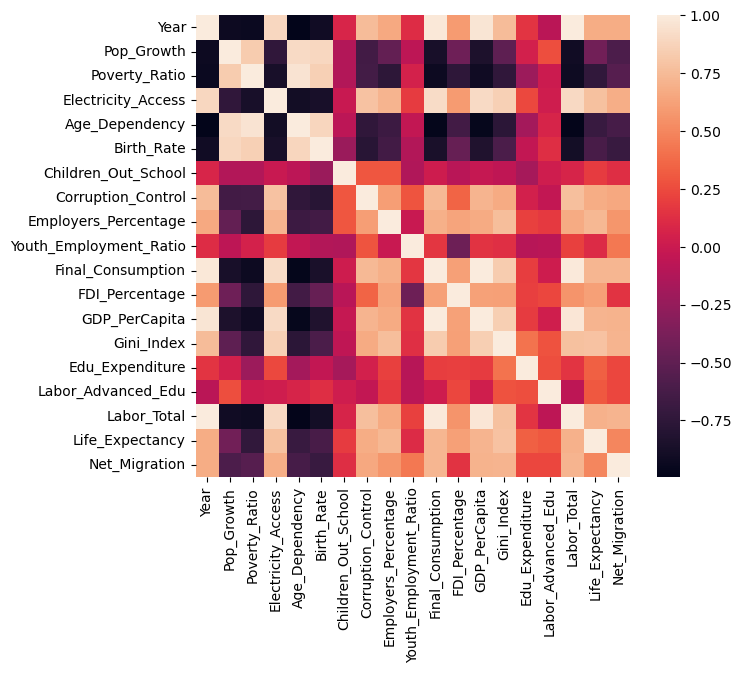

In [63]:
import seaborn as sns
corr_matrix = data.corr()
fig = plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix)

## Normalization

In [64]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a scaler object
scaler = StandardScaler()

# Scale the data
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame, preserving the column names
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Check the result
print(data_scaled.head())

       Year  Pop_Growth  Poverty_Ratio  Electricity_Access  Age_Dependency  \
0 -1.661325    1.342646       2.541774           -1.615041        1.946865   
1 -1.516862    1.179815       2.233235           -1.615041        1.681595   
2 -1.372399    1.018789       0.752248           -1.331484        1.448280   
3 -1.227936    0.862624       0.690540           -1.266048        1.221162   
4 -1.083473    0.577294       0.813955           -1.026115        1.004148   

   Birth_Rate  Children_Out_School  Corruption_Control  Employers_Percentage  \
0    1.417098        -2.813151e-16           -0.758704             -2.934654   
1    1.237922        -5.619955e-03            0.000000             -0.379891   
2    1.023142         1.446949e-01           -2.214519             -0.477925   
3    0.850858         2.310488e-01           -1.464042             -0.984911   
4    0.751507         6.623436e-01           -1.203266             -0.084973   

   Youth_Employment_Ratio  Final_Consumption  FDI_

## VIF

In [65]:
y = data_scaled['GDP_PerCapita']

x = data_scaled[["Pop_Growth",  
                 "Poverty_Ratio",
                "Electricity_Access",
                "Age_Dependency",
                "Birth_Rate",
                "Children_Out_School", 
                "Corruption_Control",
                "Employers_Percentage",
                "Youth_Employment_Ratio",
                "Final_Consumption",
                "FDI_Percentage",
                "Gini_Index",
                "Edu_Expenditure",
                "Labor_Advanced_Edu",
                "Labor_Total",
                'Life_Expectancy', 
                'Net_Migration']]


checking vif from all variable

In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.tsaplots import plot_acf

In [67]:
# Mengidentifikasi Multikolinieritas
# Menghitung VIF untuk setiapfitur
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


print("Variansi Inflasi Faktor (VIF):")
print(vif_data)

Variansi Inflasi Faktor (VIF):
                   feature          VIF
0               Pop_Growth   520.365354
1            Poverty_Ratio    63.151716
2       Electricity_Access    87.499328
3           Age_Dependency  1003.547266
4               Birth_Rate   115.683000
5      Children_Out_School     7.484599
6       Corruption_Control    11.582365
7     Employers_Percentage     9.968455
8   Youth_Employment_Ratio    44.800482
9        Final_Consumption   330.673822
10          FDI_Percentage    30.338545
11              Gini_Index    69.209176
12         Edu_Expenditure    10.293241
13      Labor_Advanced_Edu     3.258386
14             Labor_Total  1141.809651
15         Life_Expectancy    26.872696
16           Net_Migration    43.473649


predict with data before PCA

In [68]:
import statsmodels.api as sm
# Menambahkan intercept
X = sm.add_constant(x)

# 3. Membangun Model Regresi Linier Berganda
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          GDP_PerCapita   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              813.7
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                    7.09e-10
Time:                        02:00:18   Log-Likelihood:                          57.019
No. Observations:                  24   AIC:                                     -80.04
Df Residuals:                       7   BIC:                                     -60.01
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Pop_Growth                -0.1101      0.194     -0.568      0.588      -0.569       0.348
Poverty_Ratio             -0.0295      0.068     -0.437      0.675      -0.189       0.130
Electricity_Access         0.1215      0.080      1.528      0.170      -0.066       0.310
Age_Dependency             0.7040      0.269      2.614      0.035       0.067       1.341
Birth_Rate                 0.1490      0.091      1.630      0.147      -0.067       0.365
Children_Out_School       -0.0234      0.023     -1.007      0.348      -0.078       0.032
Corruption_Control         0.0374      0.029      1.293      0.237      -0.031       0.106
Employers_Percentage       0.0031      0.027      0.114      0.913      -0.060       0.067
Youth_Employment_Ratio    -0.1094      0.057     -1.922      0.096      -0.244       0.025
Final_Consumption          1.3162      0.155      8.515      0.000       0.951       1.682
FDI_Percentage            -0.0413      0.047     -0.882      0.407      -0.152       0.069
Gini_Index                 0.0224      0.071      0.317      0.761      -0.145       0.190
Edu_Expenditure           -0.0217      0.027     -0.796      0.452      -0.086       0.043
Labor_Advanced_Edu         0.0142      0.015      0.924      0.386      -0.022       0.050
Labor_Total                0.3243      0.287      1.129      0.296      -0.355       1.003
Life_Expectancy           -0.0038      0.044     -0.087      0.933      -0.108       0.100
Net_Migration             -0.0776      0.056     -1.385      0.209      -0.210       0.055
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.433
Skew:                           0.182   Prob(JB):                        0.805
Kurtosis:                       2.452   Cond. No.                         128.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
y_pred = model.predict(x)

error = y-y_pred
gab = pd.DataFrame({'Actual':y, 'Predicted': y_pred, 'Error':error})
gab

,Actual,Predicted,Error
0,-1.534231,-1.540158,0.005927
1,-1.558017,-1.563934,0.005917
2,-1.446112,-1.421794,-0.024317
3,-1.324043,-1.326867,0.002824
4,-1.261077,-1.267504,0.006427
5,-1.176985,-1.204132,0.027148
6,-0.935551,-0.918074,-0.017478
7,-0.735826,-0.706215,-0.029611
8,-0.508832,-0.488665,-0.020167
9,-0.438130,-0.478419,0.040289


In [70]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y, y_pred)
meanSqErr = metrics.mean_squared_error(y, y_pred)
rootMeanSqError = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqError)

Mean Absolute Error:  0.018142834783507217
Mean Square Error:  0.0005057630469029694
Root Mean Square Error:  0.022489176216637402


## Principal Component Analysis

In [71]:
from sklearn.decomposition import PCA

model_pca = PCA()
x_pca = model_pca.fit_transform(x)

varians dari beberapa varibel

In [72]:
# Menampilkan komponen utama
explained_variance = model_pca.explained_variance_ratio_
print(f"Proporsi Variansi yang Dijelaskan : {explained_variance}")

Proporsi Variansi yang Dijelaskan : [5.77657964e-01 1.15049215e-01 9.31195463e-02 7.47661857e-02
 4.17474043e-02 3.34979132e-02 2.03625609e-02 1.63759686e-02
 1.01481780e-02 7.83977076e-03 4.26657170e-03 3.29891693e-03
 9.90113148e-04 6.03597885e-04 1.96855635e-04 4.40880422e-05
 3.51498703e-05]


hasil vif setelah di PCA

In [73]:
x_pca = pd.DataFrame(x_pca)
vif_data_pca = pd.DataFrame()
vif_data_pca['feature'] = x.columns
vif_data_pca['VIF'] = [variance_inflation_factor(x_pca.values, i) for i in range(x.shape[1])]


print("Variansi Inflasi Faktor (VIF):")
print(vif_data_pca)

Variansi Inflasi Faktor (VIF):
                   feature  VIF
0               Pop_Growth  1.0
1            Poverty_Ratio  1.0
2       Electricity_Access  1.0
3           Age_Dependency  1.0
4               Birth_Rate  1.0
5      Children_Out_School  1.0
6       Corruption_Control  1.0
7     Employers_Percentage  1.0
8   Youth_Employment_Ratio  1.0
9        Final_Consumption  1.0
10          FDI_Percentage  1.0
11              Gini_Index  1.0
12         Edu_Expenditure  1.0
13      Labor_Advanced_Edu  1.0
14             Labor_Total  1.0
15         Life_Expectancy  1.0
16           Net_Migration  1.0


## Modelling After Do PCA Method

In [74]:
import statsmodels.api as sm
# Menambahkan intercept
X_pca = sm.add_constant(x_pca)

# 3. Membangun Model Regresi Linier Berganda
modelPCA = sm.OLS(y, x_pca).fit()
modelPCA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          GDP_PerCapita   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              813.7
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                    7.09e-10
Time:                        02:00:18   Log-Likelihood:                          57.019
No. Observations:                  24   AIC:                                     -80.04
Df Residuals:                       7   BIC:                                     -60.01
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.3059      0.003   -112.768      0.000      -0.312      -0.299
1              0.0251      0.006      4.122      0.004       0.011       0.039
2             -0.0022      0.007     -0.331      0.751      -0.018       0.014
3             -0.1537      0.008    -20.387      0.000      -0.172      -0.136
4             -0.0953      0.010     -9.444      0.000      -0.119      -0.071
5              0.0962      0.011      8.542      0.000       0.070       0.123
6             -0.0231      0.014     -1.596      0.155      -0.057       0.011
7              0.0854      0.016      5.299      0.001       0.047       0.123
8              0.3865      0.020     18.886      0.000       0.338       0.435
9             -0.1344      0.023     -5.773      0.001      -0.189      -0.079
10             0.0925      0.032      2.930      0.022       0.018       0.167
11             0.0113      0.036      0.315      0.762      -0.074       0.096
12            -0.0711      0.066     -1.086      0.314      -0.226       0.084
13             0.5757      0.084      6.861      0.000       0.377       0.774
14             0.8605      0.147      5.857      0.001       0.513       1.208
15            -0.9182      0.310     -2.957      0.021      -1.652      -0.184
16            -0.4070      0.348     -1.170      0.280      -1.229       0.415
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.433
Skew:                           0.182   Prob(JB):                        0.805
Kurtosis:                       2.452   Cond. No.                         128.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

korelasi dari variabel GDP dengan masing masing variabel

In [75]:
# Melihat korelasi variabel 'GDP per capita (current US$)' terhadap semua variabel lain
correlation_with_gdp_per_capita = data_scaled.corr()['GDP_PerCapita']

# Menampilkan hasil
print(correlation_with_gdp_per_capita)


Year                      0.968058
Pop_Growth               -0.846636
Poverty_Ratio            -0.914483
Electricity_Access        0.913471
Age_Dependency           -0.966613
Birth_Rate               -0.825001
Children_Out_School      -0.028440
Corruption_Control        0.712252
Employers_Percentage      0.672168
Youth_Employment_Ratio    0.148579
Final_Consumption         0.995946
FDI_Percentage            0.623307
GDP_PerCapita             1.000000
Gini_Index                0.847890
Edu_Expenditure           0.184411
Labor_Advanced_Edu        0.032587
Labor_Total               0.973408
Life_Expectancy           0.713787
Net_Migration             0.707481
Name: GDP_PerCapita, dtype: float64


predict data

In [76]:
y_pred = modelPCA.predict(x_pca)

error = y-y_pred
gab = pd.DataFrame({'Actual':y, 'Predicted': y_pred, 'Error':error})
gab

,Actual,Predicted,Error
0,-1.534231,-1.540158,0.005927
1,-1.558017,-1.563934,0.005917
2,-1.446112,-1.421794,-0.024317
3,-1.324043,-1.326867,0.002824
4,-1.261077,-1.267504,0.006427
5,-1.176985,-1.204132,0.027148
6,-0.935551,-0.918074,-0.017478
7,-0.735826,-0.706215,-0.029611
8,-0.508832,-0.488665,-0.020167
9,-0.438130,-0.478419,0.040289


model evaluation after do PCA

In [77]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y, y_pred)
meanSqErr = metrics.mean_squared_error(y, y_pred)
rootMeanSqError = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('Mean Absolute Error: ', meanAbErr)
print('Mean Square Error: ', meanSqErr)
print('Root Mean Square Error: ', rootMeanSqError)

Mean Absolute Error:  0.01814283478350688
Mean Square Error:  0.0005057630469029664
Root Mean Square Error:  0.022489176216637336


## Uji heterokedastisitas

In [78]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#breusch-pagan test
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

test_result = sms.het_breuschpagan(modelPCA.resid, modelPCA.model.exog)

lzip(names, test_result)

[('Lagrange multiplier statistic', 7.666947789557123),
 ('p-value', 0.958168619861196),
 ('f-value', 0.19328772484813733),
 ('f p-value', 0.9973304312163731)]

## Uji residual

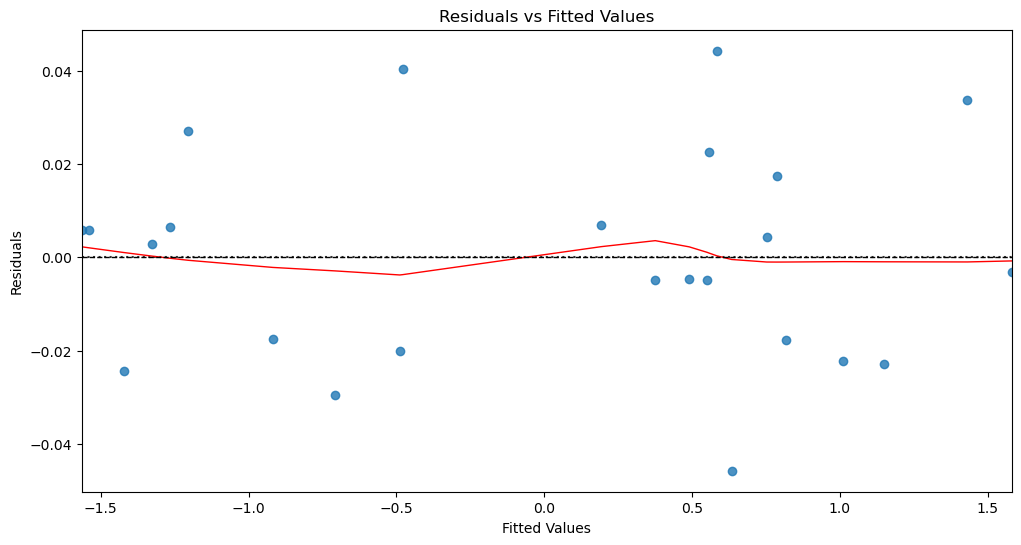

In [79]:
# 7. Analisis Residual
# Plot residuals untuk melihat pola
plt.figure(figsize=(12, 6))
sns.residplot(x=modelPCA.fittedvalues, y=modelPCA.resid, lowess=True, 
               line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, color='black', ls='--', lw=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## Uji Autokorelasi

<Figure size 1200x600 with 0 Axes>

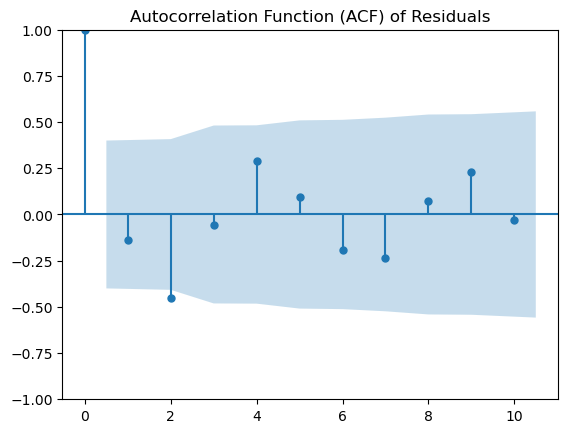

In [80]:
# 6. Uji Autokorelasi
# Plot ACF untuk melihat autokorelasi
plt.figure(figsize=(12, 6))
plot_acf(modelPCA.resid, lags=10)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()


e:\APK\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


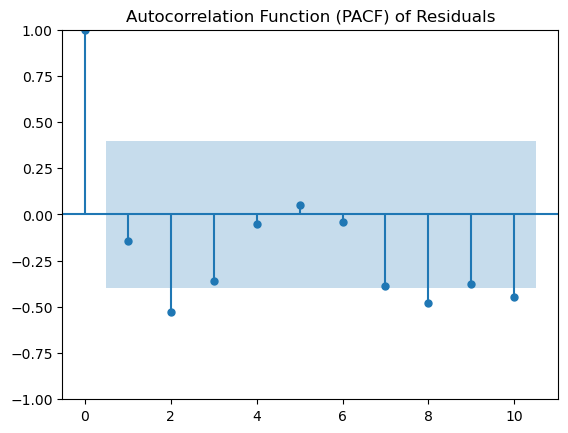

In [81]:
#plot pacf
sm.graphics.tsa.plot_pacf(modelPCA.resid, lags=10)
plt.title('Autocorrelation Function (PACF) of Residuals')
plt.show()